In [4]:
# compare the sextractor catalog from my stacked image
# to the dophot catalog that Brian Stalder ran

In [5]:
import sys # needed to import cat_utils 
#sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')
sys.path.insert(0, '/home/abrahamn/21cmIRxcor/')

In [6]:
import imp
import cat_utils
imp.reload(cat_utils)

<module 'cat_utils' from '/home/abrahamn/21cmIRxcor/cat_utils.pyc'>

In [7]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
raw_frames_path = '/Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/'
analysis_root = '/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/'
dphcat = cat_utils.IRCatalog(dph_path=raw_frames_path+'02a57694o0326I.dph',fits_path=analysis_root+'/02a57694o0326I/02a57694o0326I_5degframecentered.fits')

loading /Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/02a57694o0326I.dph
identifying and excluding artifacts (ie, saturated pixels)
0.0
0.0920471281296
0.184094256259
0.276141384389
0.368188512518
0.460235640648
0.552282768778
0.644329896907
0.736377025037
0.828424153166
0.920471281296


In [ ]:
#analysis_root = '/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57639/whole_field/'
analysis_root = '/home/abrahamn/xcor_data/analysis/ATLAS_mwa57639/whole_field/'
secat = cat_utils.IRCatalog(se_path=analysis_root+'whole_field_bgsub.sex',fits_path=analysis_root+'whole_field_bgsub.fits',se_magzpt=20.46)

loading/home/abrahamn/xcor_data/analysis/ATLAS_mwa57639/whole_field/whole_field_bgsub.sex
identifying and excluding artifacts (ie, saturated pixels)


0.0
0.00552938314202
0.011058766284


In [ ]:
import cPickle as pickle
pickle.dump( secat, open( analysis_root+'whole_field_secat.p', "wb" ) )
#secat = pickle.load( open( analysis_root+'whole_field_secat.p', "rb" ) )

In [39]:
analysis_root+'whole_field_secat.p'

'/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57639/whole_field/whole_field_secat.p'

(-26, -24.5)

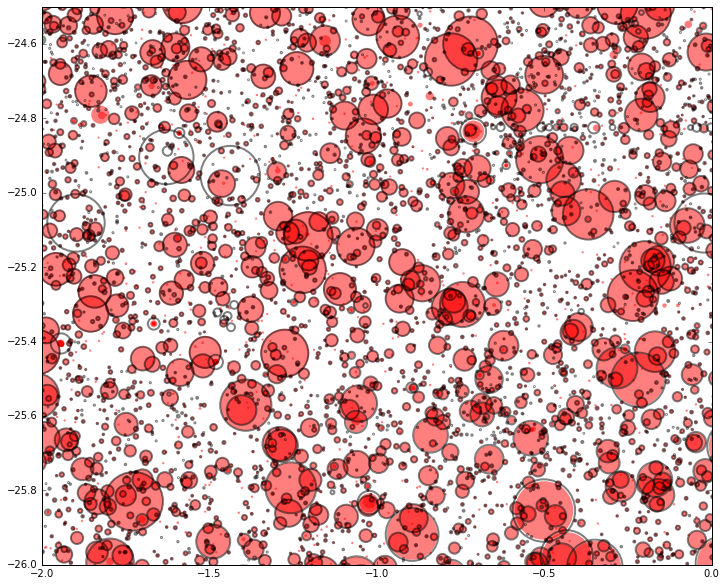

In [40]:
plt.figure(figsize=(12,10))
plt.scatter(dphcat.ra,dphcat.dec,15000*dphcat.jy,'r',alpha=.5,edgecolor='none')
plt.scatter(secat.ra,secat.dec,15000*secat.jy,alpha=.5,facecolors='none',edgecolors='k',linewidth=2)
plt.xlim([-2,0])
plt.ylim([-26,-24.5])

(-20, -40)

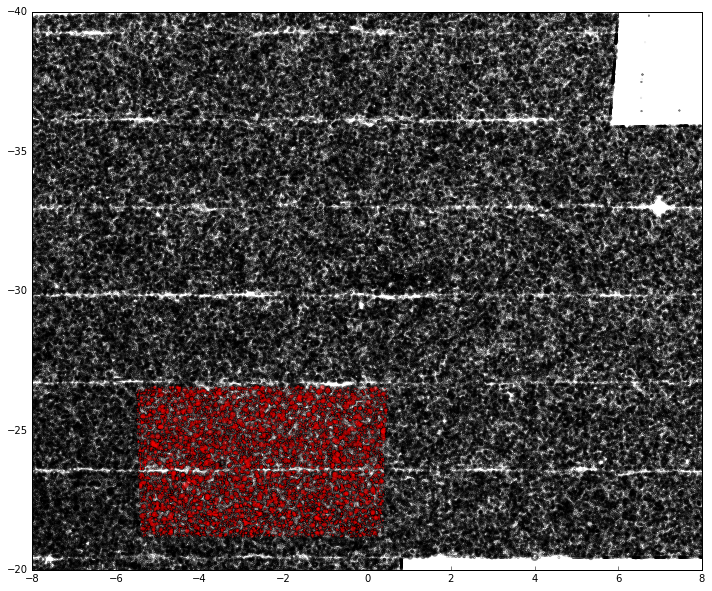

In [43]:
plt.figure(figsize=(12,10))
plt.scatter(secat.ra,secat.dec,150*secat.jy,alpha=.5,facecolors='none',edgecolors='k',linewidth=2)
plt.scatter(dphcat.ra,dphcat.dec,150*dphcat.jy,'r',alpha=.5,edgecolor='none')
plt.xlim([-8,8])
plt.ylim([-20,-40])

(30, 31)
(30, 31)


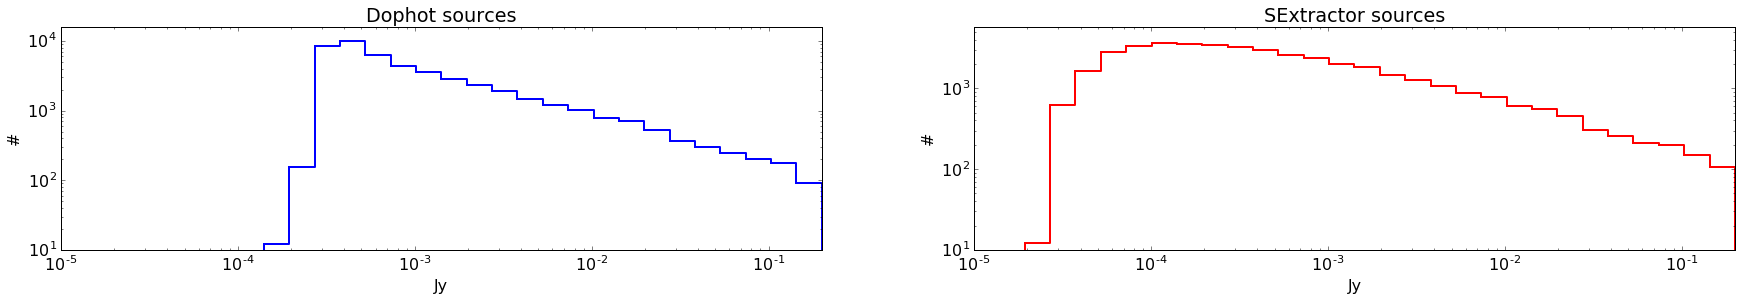

In [77]:
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(30,4))
plt.subplot(121)
cat_utils.logloghist(plt,dphcat.jy[dphcat.jy<5],.00001,.2,30,'b')
plt.xlim([.00001,.2])#plt.xlim([0,.01])
plt.title('Dophot sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')

plt.subplot(122)
cat_utils.logloghist(plt,secat.jy[secat.jy<5],.00001,.2,30,'r')
plt.xlim([.00001,.2])
#plt.xlim([0,10])
plt.title('SExtractor sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')

(74866,)